In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

## 概述

### 1.matplotlib的三层api
matplotlib的原理或者说基础逻辑是，使用artist对象在画布canvas上绘制render图形<br>
matplotlib.backend_bases.FigureCanvas 绘图区<br>
matplotlib.backend_bases.Renderer 渲染器，可以理解为如何在canvas上画图<br>
matploylib.artist.Artist 具体的图表组件

## 详解matplotlib.artist.Artist
artist有两种类型primitives和containers<br>
primitive是基本要素，包含一些标准图形对象，即每种图形属于那种对象<br>
container是容器，用来装基本要素，包括图形figure，坐标系axes和坐标轴axis

### 基本要素primitives
- 重点介绍primitives的几种类型：曲线-line2D，矩形-Rectangle，多边形-polygon，图像image

#### Line-2D
- Line2D的属性
    - xdata:x轴数据集，若忽略，则默认range(1,len(ydata)+1)
    - ydata:y轴数据集
    - linewidth:线宽
    - linestyle:线型
    - color:颜色
    - marker:点的形状
    - markersize:点的大小
    - markeredgecolor:点的边框颜色
    - markeredgewidth:点的边框宽度

##### 设置Line2D的属性的三种方法
- 直接在plot()函数中设置
- 通过获取线对象，在线对象中设置
- 获得线属性，使用setp()函数设置

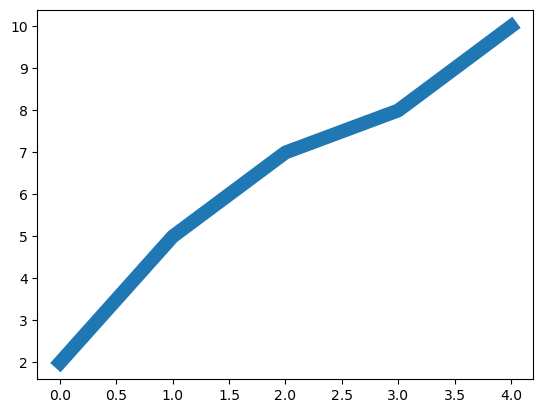

In [2]:
# 1-直接在plot()函数中设置
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y,linewidth=10); #设置线的粗细为10

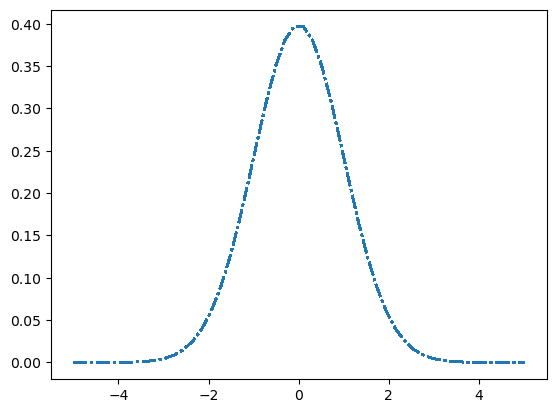

In [3]:
# 2-通过获得线对象，对线对象进行设置
from scipy.stats import norm
x = np.linspace(-5,5,50)
y = norm.pdf(x,0,1)
line, = plt.plot(x,y,'--') 
line.set_linestyle('-.')
'''
在 Matplotlib 中，plt.plot() 函数用于绘制二维图形，
并返回一个包含 Line2D 对象的列表。Line2D 对象是 Matplotlib 中的一个 
artist，它代表绘制的线条。Line2D 对象包含了与线条相关的各种属性和方法。
'''
line.set_antialiased(False) # 关闭抗锯齿功能


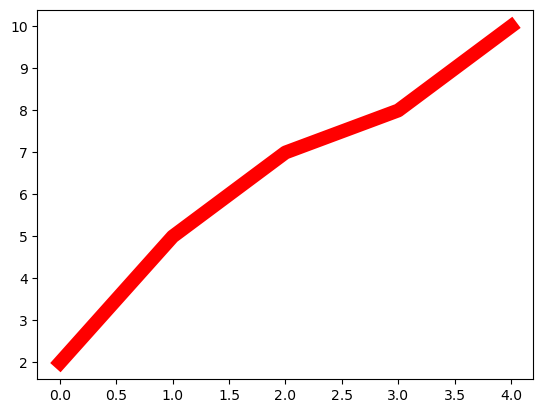

In [ ]:
# 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x,y)
plt.setp(lines,color='r',linewidth=10);
# 批量设置线对象的属性，理解成全局设置

##### 绘制直线line
- 1 plt.plot()方法绘制
- 2 Line2D方法绘制


<Axes.ArtistList of 2 lines>


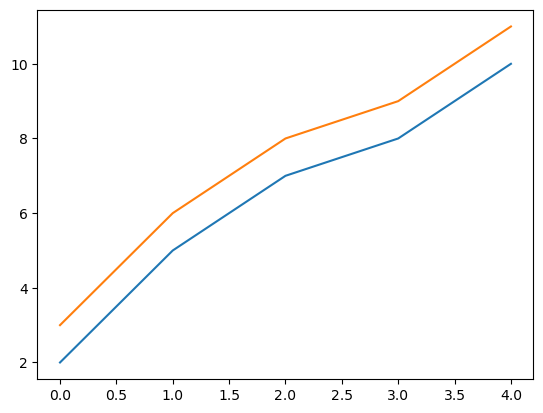

In [5]:
# 1-绘制直线line
x = range(0,5)
y1 = [2,5,7,8,10]
y2 = [3,6,8,9,11]
fig,ax = plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
print(ax.lines);# 通过直接使用辅助方法画线，
 # 打印ax.lines后可以看到在matplotlib在底层创建了两个Line2D对象

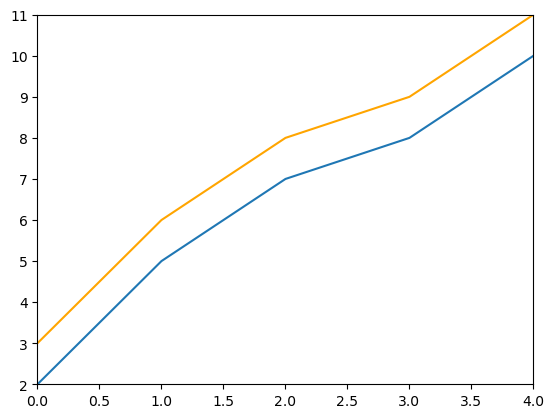

In [6]:
# 2-Line2D对象绘制
x = range(0,5)
y1 = [2,5,7,8,10]
y2 = [3,6,8,9,11]
fig,ax = plt.subplots()
lines = [Line2D(x,y1),Line2D(x,y2,color='orange')]#显示创建Line2D对象
for line in lines:
    ax.add_line(line) #使用add_line方法将创建的Line2D添加到子图中
ax.set_xlim(0,4)
ax.set_ylim(2,11);

##### 绘制误差折线图errorbar
- errorbar中的主要参数
    - x：需要绘制的line中点的在x轴上的取值
    - y：需要绘制的line中点的在y轴上的取值
    - yerr：指定y轴水平的误差
    - xerr：指定x轴水平的误差
    - fmt：指定折线图中某个点的颜色，形状，线条风格，例如‘co--’
    - ecolor：指定error bar的颜色
    - elinewidth：指定error bar的线条宽度

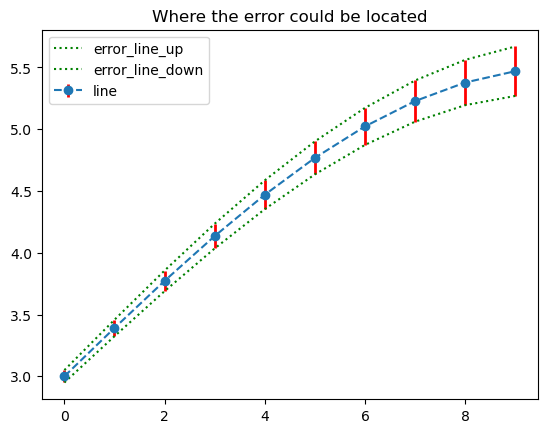

In [15]:
fig = plt.figure()
x = np.arange(10)
y = 2.5*np.sin(x/20*np.pi)
yerr = np.linspace(0.05,0.2,10)
plt.errorbar(x,y+3,yerr=yerr,fmt='o--',ecolor='r',elinewidth=2,label='line')
plt.plot(x,y+3+yerr,color='g',linestyle=':',label='error_line_up')
plt.plot(x,y+3-yerr,color='g',linestyle=':',label='error_line_down')
plt.title('Where the error could be located')
plt.legend()
plt.show()

#### patches二维图形类
- matplotlib.patches.Patch
- 矩形、多边形、楔形

##### Rectangle矩形
- 通过锚点xy及其宽度和高度生成。 Rectangle本身的主要比较简单，即xy控制锚点，width和height分别控制宽和高
- class matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)
- hist直方图、bar条形图

###### hist直方图
- x: 数据集，最终的直方图将对数据集进行统计
- bins: 统计的区间分布
- range: tuple, 显示的区间，range在没有给出bins时生效
- density: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
- histtype: 可选{'bar', 'barstacked', 'step', 'stepfilled'}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
- align: 可选{'left', 'mid', 'right'}之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
- log: bool，默认False,即y坐标轴是否选择指数刻度
- stacked: bool，默认为False，是否为堆积状图

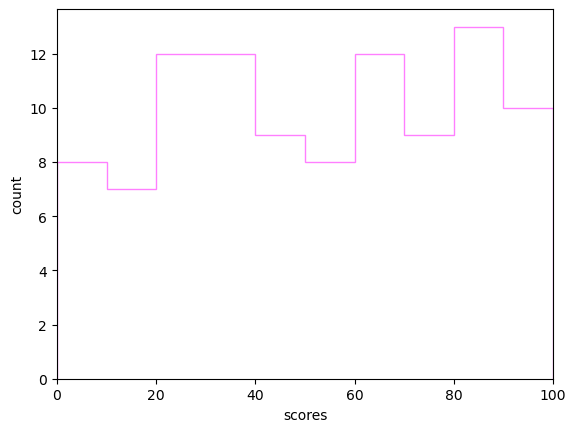

In [113]:
# 绘制hist直方图
x = np.random.randint(0,100,100)#生成[0-100)之间的100个数据,即 数据集
bins = np.arange(0,101,10)  #设置连续的边界值，即直方图的分布区间[0,10),[10,20)... 
plt.hist(x,bins,color='fuchsia',alpha=0.5,histtype='step')
plt.xlabel('scores')
plt.ylabel('count')
plt.xlim(0,100);


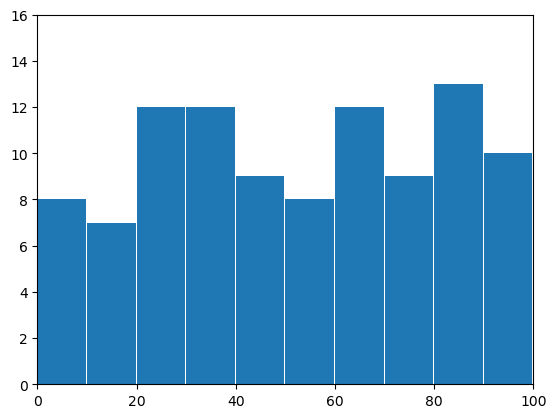

In [ ]:
# Rectangle矩形类绘制直方图--相对来说很麻烦的方法
df = pd.DataFrame(columns=['data'])
df.data = x
df['fenzu'] = pd.cut(df.data,bins = np.arange(0,101,10),right=False,include_lowest=True)
df_cnt = df.value_counts(subset='fenzu').reset_index()
# df_cnt['fenzu'].astype(str).str.extract(r'\[(.*?)\,(.*?)\)')
df_cnt[['mini','maxi']] = df_cnt['fenzu'].astype(str).str.extract(r'\[(.*?)\,(.*?)\)').apply(lambda x:x.astype(int))
# pd.concat([df_cnt,df_cnt['fenzu'].astype(str).str.extract(r'\[(.*?)\,(.*?)\)').rename(columns={0:'mini',1:'maxi'})],axis=1)
df_cnt['width'] = df_cnt['maxi']-df_cnt['mini']
df_cnt.sort_values(by='mini',inplace=True)
df_cnt.reset_index(inplace=True,drop=True)
# df_cnt
# 准备完数据，绘制图形
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in df_cnt.index:
    rect = plt.Rectangle((df_cnt.loc[i,'mini'],0),df_cnt.loc[i,'width']-0.2,df_cnt.loc[i,'count'])
    ax1.add_patch(rect)

ax1.set_xlim(0,100)
ax1.set_ylim(0,16);

###### bar-柱状图
- left：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串
- height：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；
- alpha：透明度，值越小越透明
- width：为柱形图的宽度，一般这是为0.8即可；
- color或facecolor：柱形图填充的颜色；
- edgecolor：图形边缘颜色
- label：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签

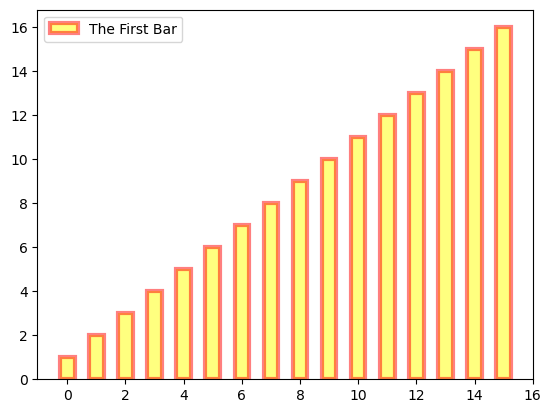

In [118]:
# 使用bar接口绘制柱状图
y = range(1,17)
plt.bar(np.arange(16),y,alpha=0.5,width=0.5,
        color='yellow',edgecolor='red',label='The First Bar',lw=3)
plt.legend();

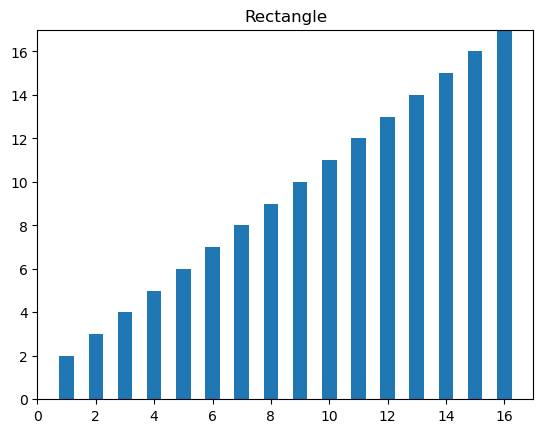

In [126]:
#  Rectangle矩形类绘制柱状图
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect = plt.Rectangle(xy=(i-0.25,0),width=0.5,height=i+1)
    ax1.add_patch(rect)

ax1.set_xlim(0,17)
ax1.set_ylim(0,17)
ax1.set_title('Rectangle');

##### Polygon-多边形
- class matplotlib.patches.Polygon(xy, closed=True, **kwargs)
- xy: 多边形的顶点
- closed 为True则指定多边形将起点和终点重合从而显式关闭多边形
- 常用fill
    - matplotlib.pyplot.fill(*args, data=None, **kwargs)
    - 绘制填充多边形
    - 关于x、y和color的序列，其中color是可选的参数，每个多边形都是由其节点的x和y位置列表定义的，后面可以选择一个颜色说明符。您可以通过提供多个x、y、[颜色]组来绘制多个多边形。

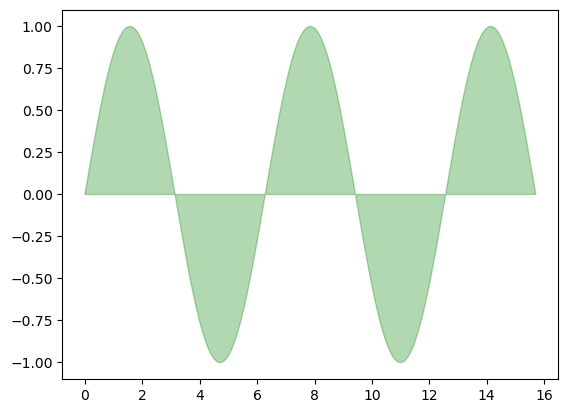

In [133]:
# 使用fill接口来绘制多边形
x = np.linspace(0,5*np.pi,1000,)
y1 = np.sin(x)
plt.fill(x,y1,color = "g",alpha = 0.3)
plt.show()

##### Wedge-楔形
- matplotlib.patches.Wedge类是楔型类。其基类也是matplotlib.patches.Patch。
- class matplotlib.patches.Wedge(center, r, theta1, theta2, width=None, **kwargs)
- 以坐标x,y为中心，半径为r，从θ1扫到θ2(单位是度)。如果宽度给定，则从内半径r -宽度到外半径r画出部分楔形。wedge中比较常见的是绘制饼状图。
- matplotlib.pyplot.pie(x, explode=None, labels=None,colors=None,startangle=0)
    - x：楔型的形状，一维数组。
    - explode：如果不是等于None，则是一个len(x)数组，它指定用于偏移每个楔形块的半径的分数。
    - labels：用于指定每个楔型块的标记，取值是列表或为None。
    - colors：饼图循环使用的颜色序列。如果取值为None，将使用当前活动循环中的颜色。
    - startangle：饼状图开始的绘制的角度。
    - 制作数据x的饼图，每个楔子的面积用x/sum(x)表示。

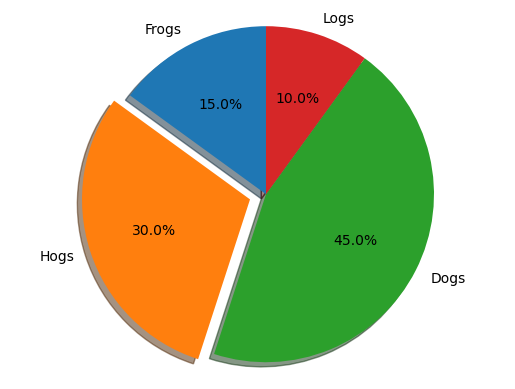

In [ ]:
# 使用plt.pie接口绘制饼图
labels = ['Frogs','Hogs','Dogs','Logs']
size = [15,30,45,10]
explodes = (0,0.1,0,0)
fig1,ax1 = plt.subplots()
ax1.pie(size,explodes,labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal');

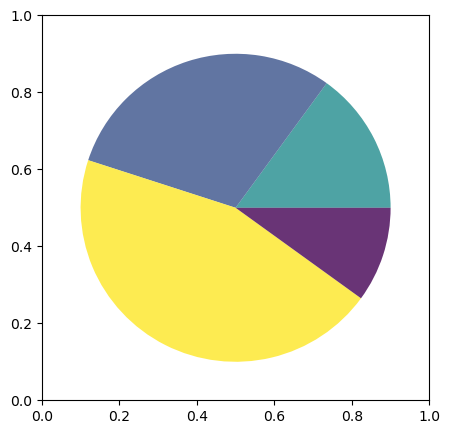

In [ ]:
# wedge绘制饼图-不好用的方法
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

sita1 = 0
size = [15,30,45,10]
patches = []
patches += [
    Wedge((0.5, 0.5), .4, 0, 54),           
    Wedge((0.5, 0.5), .4, 54, 162),  
    Wedge((0.5, 0.5), .4, 162, 324),           
    Wedge((0.5, 0.5), .4, 324, 360) 
]
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.8)
p.set_array(colors)
ax1.add_collection(p);

##### collections类
- collections类是用来绘制一组对象的集合collections有许多不同的子类，如RegularPolyCollection, CircleCollection, Pathcollection, 分别对应不同的集合子类型。其中比较常用的就是散点图，它是属于PathCollection子类

###### scatter散点图
- Axes.scatter(self, x, y, s=None, c=None, marker=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None)
- x：数据点x轴的位置
- y：数据点y轴的位置
- s：尺寸大小
- c：可以是单个颜色格式的字符串，也可以是一系列颜色
- marker: 标记的类型

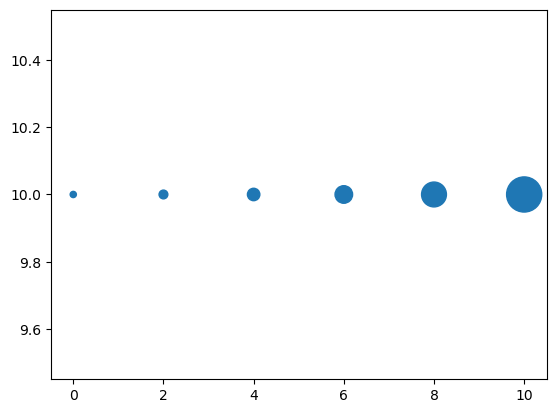

In [10]:
# 使用plt.scatter()绘制散点图
x = [0,2,4,6,8,10] 
y = [10]*len(x) 
s = [20*2**n for n in range(len(x))] 
plt.scatter(x,y,s=s);

##### images类
- images是matplotlib中绘制image图像的类，其中最常用的imshow可以根据数组绘制成图像，它的构造函数：
- class matplotlib.image.AxesImage(ax, cmap=None, norm=None, interpolation=None, origin=None, extent=None, filternorm=True, filterrad=4.0, resample=False, **kwargs)

###### imshow绘制图像
- matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=, filternorm=1, filterrad=4.0, imlim=, resample=None, url=None, *, data=None, **kwargs)
- 使用imshow画图时首先需要传入一个数组，数组对应的是空间内的像素位置和像素点的值，interpolation参数可以设置不同的差值方法

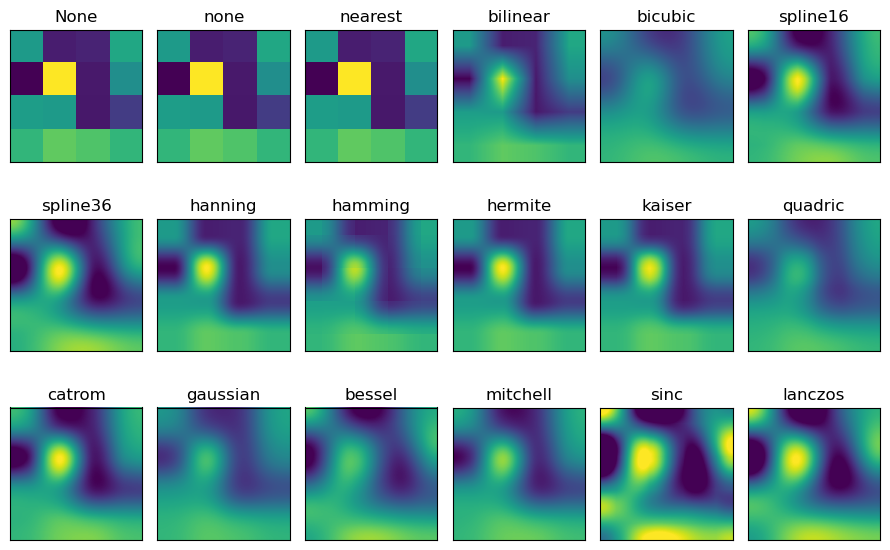

In [11]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout();

### 对象容器
- 容器会包含一些primitives，并且容器还有它自身的属性。
比如Axes Artist，它是一种容器，它包含了很多primitives，比如Line2D，Text；同时，它也有自身的属性，比如xscal，用来控制X轴是linear还是log的。
- 在容器中Figure包含Axes，Axes又包含Axis

#### Figure容器
- matplotlib.figure.Figure是Artist最顶层的container对象容器，它包含了图表中的所有元素。一张图表的背景就是在Figure.patch的一个矩形Rectangle。
- Figure的属性
    - Figure.patch属性：Figure的背景矩形
    - Figure.axes属性：一个Axes实例的列表(包括Subplot)
    - Figure.images属性：一个FigureImages patch列表
    - Figure.lines属性：一个Line2D实例的列表（很少使用）
    - Figure.legends属性：一个Figure Legend实例列表(不同于Axes.legends)
    - Figure.texts属性：一个Figure Text实例列表

Axes(0.125,0.53;0.775x0.35)
[<Axes: >, <Axes: >]


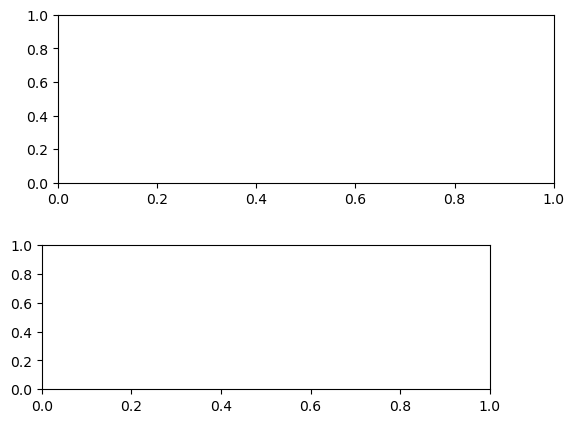

In [ ]:
'''
当我们向图表添加Figure.add_subplot()或者Figure.add_axes()元素时
这些元素都会被添加到Figure.axes列表中
'''
fig = plt.figure()
ax1 = fig.add_subplot(211) #做一幅2*1的图，选第一个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) 
# 位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1)
print(fig.axes)

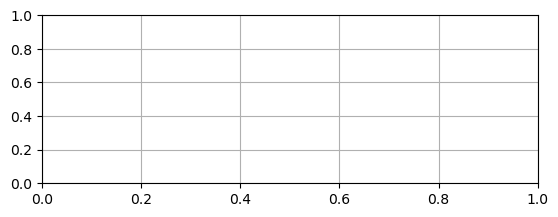

In [13]:
'''
通过Figure.add_subplot()、Figure.add_axes()来添加元素，通过Figure.delaxes()来删除元素。
但是你可以迭代或者访问Figure.axes中的Axes，然后修改这个Axes的属性。
'''
fig = plt.figure()
ax1 = fig.add_subplot(211)

for ax in fig.axes:
    ax.grid(True)


#### Axes容器
- Axes有许多方法用于绘图，如.plot()、.text()、.hist()、.imshow()等方法
- Axes包含了一个patch属性，对于笛卡尔坐标系而言，它是一个Rectangle；对于极坐标而言，它是一个Circle。这个patch属性决定了绘图区域的形状、背景和边框。
- 你可以通过ax.patch来访问这个patch。
- 你可以通过ax.patch.set_facecolor()来设置背景颜色。
- 你可以通过ax.patch.set_edgecolor()来设置边框颜色。
- Axes的常见属性
    - artists: Artist实例列表
    - patch: Axes所在的矩形实例
    - collections: Collection实例
    - images: Axes图像
    - legends: Legend 实例
    - lines: Line2D 实例
    - patches: Patch 实例
    - texts: Text 实例
    - xaxis: matplotlib.axis.XAxis 实例
    - yaxis: matplotlib.axis.YAxis 实例

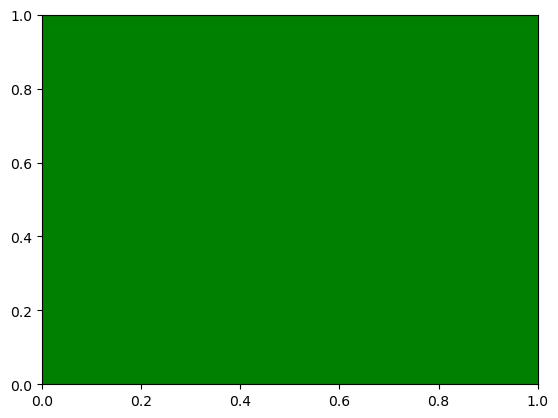

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch  # axes的patch是一个Rectangle实例
rect.set_facecolor('green')

#### Axis容器
- matplotlib.axis.Axis实例处理tick line、grid line、tick label以及axis label的绘制，它包括坐标轴上的刻度线、刻度label、坐标网格、坐标轴标题。
- 刻度包括主刻度和次刻度，它们都是Tick刻度对象。

<a list of 22 Line2D ticklines objects>

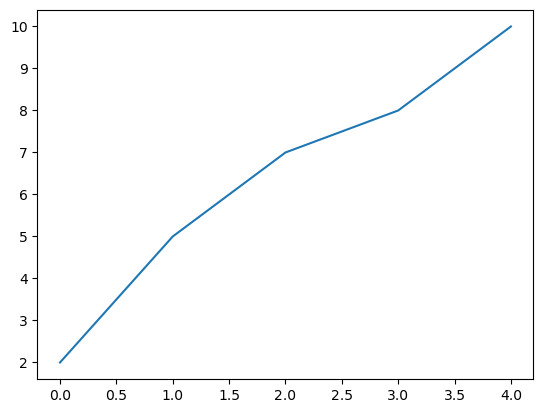

In [30]:
# 不用print，直接显示结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-');
axis = ax.xaxis ;# axis为X轴对象
# axis.get_ticklocs()   # 获取刻度线位置
# axis.get_ticklabels()   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
axis.get_ticklines()    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
# axis.get_data_interval()# 获取轴刻度间隔
# axis.get_view_interval()# 获取轴视角（位置）的间隔

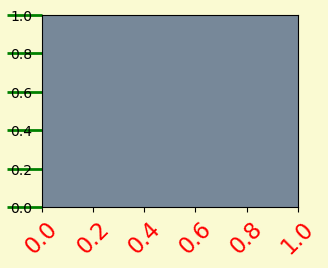

In [27]:
fig = plt.figure() # 创建一个新图表
rect = fig.patch   # 矩形实例并将其设为黄色
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，
rect = ax1.patch   # ax1的矩形设为灰色
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('red') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(16) # 字体大小

for line in ax1.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_markeredgecolor('green')    # 颜色
    line.set_markersize(25)    # marker大小
    line.set_markeredgewidth(2)# marker粗细

#### Tick容器
- matplotlib.axis.Tick是从Figure到Axes到Axis到Tick中最末端的容器对象。
Tick包含了tick、grid line实例以及对应的label。
- 常见的tick属性
- Tick.tick1line：Line2D实例
- Tick.tick2line：Line2D实例
- Tick.gridline：Line2D实例
- Tick.label1：Text实例
- Tick.label2：Text实例
- y轴分为左右两个，因此tick1对应左侧的轴；tick2对应右侧的轴。
- x轴分为上下两个，因此tick1对应下侧的轴；tick2对应上侧的轴。

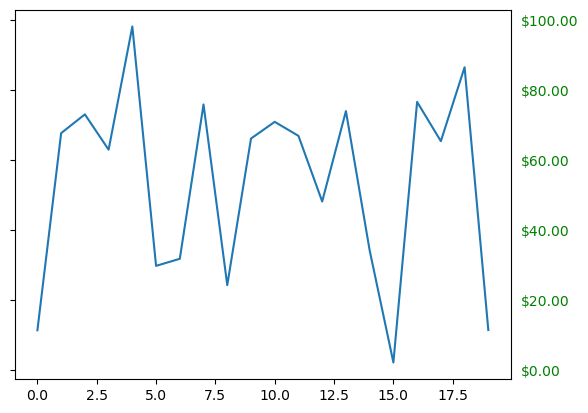

In [31]:
fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# 设置ticker的参数，右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True);

#### parctice
使用提供的drug数据集，对第一列yyyy和第二列state分组求和，画出下面折线图。PA加粗标黄，其他为灰色。
图标题和横纵坐标轴标题，以及线的文本暂不做要求。

In [32]:
drug_data = pd.read_csv('../data/Drugs.csv')
drug_data.head()

,YYYY,State,COUNTY,SubstanceName,DrugReports
0,2010,VA,ACCOMACK,Propoxyphene,1
1,2010,OH,ADAMS,Morphine,9
2,2010,PA,ADAMS,Methadone,2
3,2010,VA,ALEXANDRIA CITY,Heroin,5
4,2010,PA,ALLEGHENY,Hydromorphone,5


In [40]:
df = drug_data.groupby(by=['State','YYYY'])[['DrugReports']].sum().reset_index()
df.head(8)

,State,YYYY,DrugReports
0,KY,2010,10453
1,KY,2011,10289
2,KY,2012,10722
3,KY,2013,11148
4,KY,2014,11081
5,KY,2015,9865
6,KY,2016,9093
7,KY,2017,9394


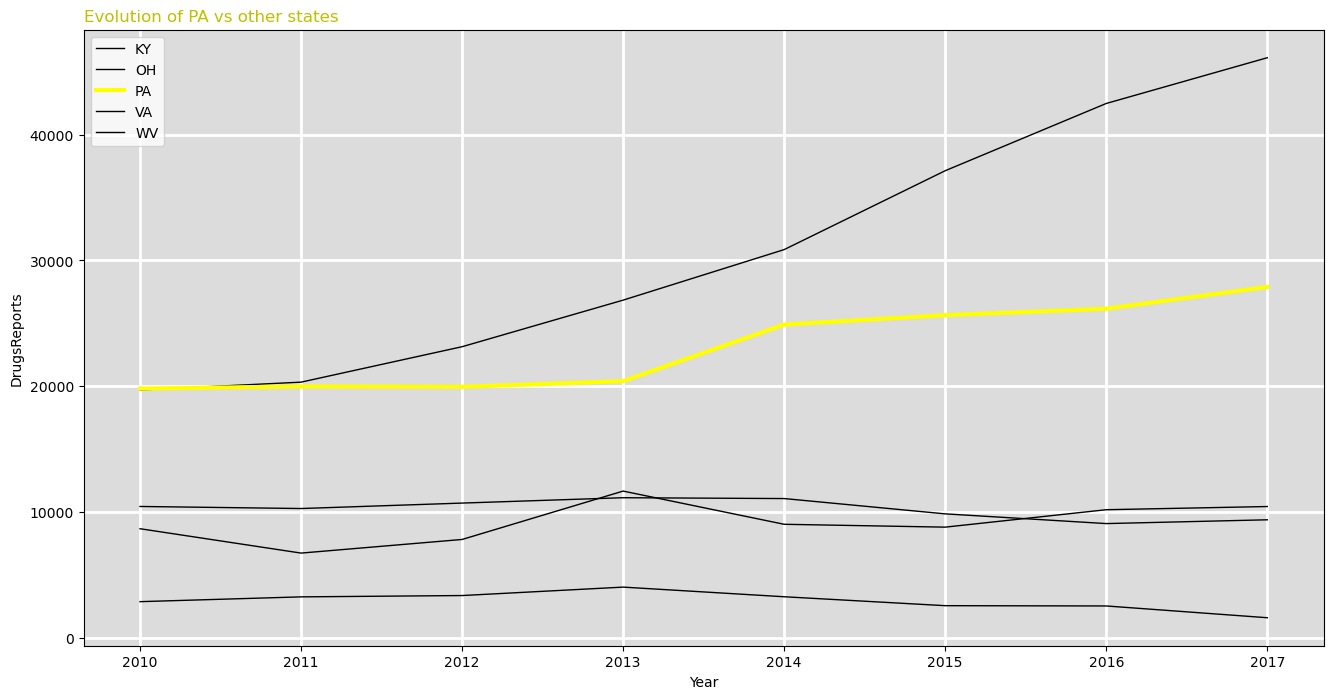

In [60]:
fig,ax = plt.subplots(figsize=(16,8))
ax.patch.set_facecolor('gainsboro')
ax.grid(True,color='white',linewidth=2)

for state,data in df.groupby('State'):
    if state == 'PA':
        ax.plot(data['YYYY'],data['DrugReports'],label=state,color='yellow',linewidth=3)
    else:
        ax.plot(data['YYYY'],data['DrugReports'],label=state,color='black',linewidth=1)
ax.set_xlabel('Year')
ax.set_ylabel('DrugsReports')
ax.set_title('Evolution of PA vs other states',color='y',loc='left')
ax.legend();

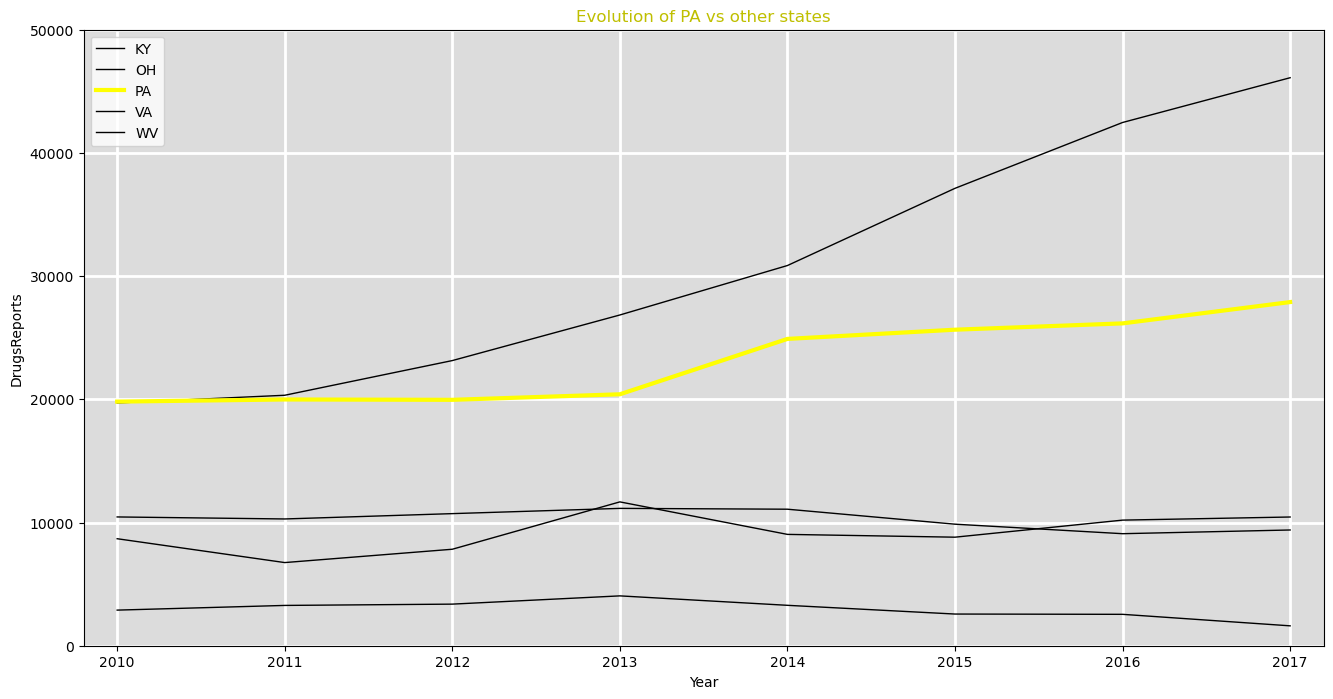

In [ ]:
fig,ax = plt.subplots(figsize=(16,8))
ax.patch.set_facecolor('gainsboro')
ax.grid(True,color='white',linewidth=2)

for state,data in df.groupby('State'):
    if state == 'PA':
        ax.add_line(Line2D(data['YYYY'],data['DrugReports'],label=state,color='yellow',linewidth=3))
    else:
        ax.add_line(Line2D(data['YYYY'],data['DrugReports'],label=state,color='black',linewidth=1))
ax.set_xlim(2009.8,2017.2)
ax.set_ylim(0,50000)
ax.set_xlabel('Year')
ax.set_ylabel('DrugsReports')
ax.set_title('Evolution of PA vs other states',color='y')
ax.legend();

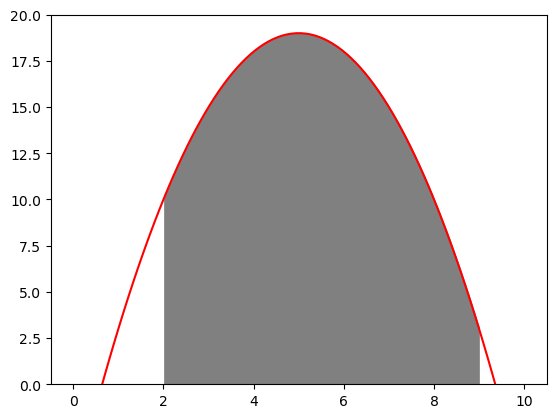

In [ ]:
x = np.linspace(0,10,100)
y = [-1*(i-2)*(i-8)+10 for i in x]
plt.plot(x,y,color='red')
plt.fill_between(x,y,where=(x>2)&(x<9),color='grey')
plt.ylim((0,20))
plt.show()

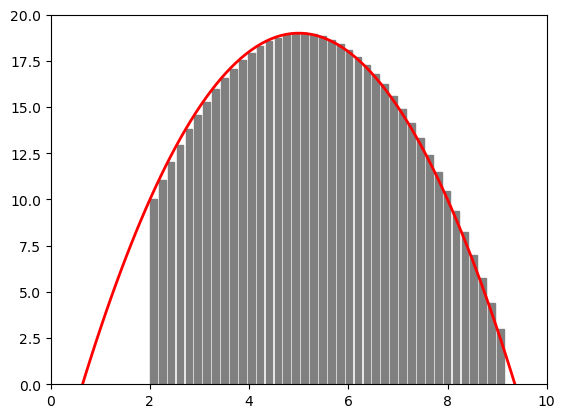

In [21]:
x = np.linspace(0,10,100)
x1 = np.linspace(2,9,40)
y = [-1*(i-2)*(i-8)+10 for i in x]
y1 = [-1*(i-2)*(i-8)+10 for i in x1]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x,y,color='red',lw=2)
for x,y in zip(x1,y1):
    rect = plt.Rectangle(xy=(x,0),width=0.135,height=y,color='grey')
    ax1.add_patch(rect)
ax1.set_xlim(0,10)
ax1.set_ylim(0,20);